## Assumption

According to Skiena's note, we could start our model with a linear model likes this:
$$P(Wins|\sim) = f(score,\ time\ left,\ field\ position)$$ where $\sim$ are the given observation.


### Logistic Regression

#### Motivation
Since we are going to decide whether a team is going to clear its bets, this might goes to a classification problem (**clear** and **not clear**). We could use **logistic regression** to decide what's the probability that team A is going to clear the bets.

#### Usage
```python
lg = sklearn.linear_model.LogisticRegression()
lg.fit(X, y) # X would be the collection of vectors of score, time_left, field_position
             # y would be a bunch of value that clear the bet or not
prob = predict(X_new) # get the probability
```

#### How we treat dataset

Each match would have 2 blocks of record (the other one is the counterpart)



In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.preprocessing import normalize

In [150]:
dat = pd.read_csv('data/201401-201408_baseline_cleandata.csv')

In [151]:
dat.describe()

,qtr,lefttime,score,yrdln,cover,eid,season,week
count,43262.000000,43262.000000,43262.000000,43262.000000,43262.000000,4.326200e+04,43262.0,43262.000000
mean,2.573020,1725.617586,11.512690,50.000000,0.000000,2.014097e+09,2014.0,4.448107
std,1.124842,1057.298195,10.277406,25.627503,0.996376,4.985457e+03,0.0,2.318281
min,1.000000,0.000000,0.000000,1.000000,-1.000000,2.014090e+09,2014.0,1.000000
25%,2.000000,820.000000,3.000000,29.000000,-1.000000,2.014091e+09,2014.0,2.000000
50%,3.000000,1800.000000,10.000000,50.000000,0.000000,2.014093e+09,2014.0,4.000000
75%,4.000000,2614.000000,17.000000,71.000000,1.000000,2.014101e+09,2014.0,6.000000
max,5.000000,4498.000000,54.000000,99.000000,1.000000,2.014103e+09,2014.0,8.000000


In [170]:
train = dat
train = train[train.cover != 0]

In [171]:
lg = lm.LogisticRegression()

In [186]:
# X = train.loc[:,['lefttime', 'yrdln', 'score']]
X = normalize(train.loc[:,['lefttime', 'yrdln', 'score']])
# X = [[200*x[0], x[1], x[2]] for x in X]

In [187]:
# weight = 1/(dat.lefttime+1)
# lg.fit(X, train.loc[:, 'cover'], sample_weight=weight)
lg.fit(X, train.loc[:, 'cover'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [180]:
lg.classes_

array([-1.,  1.])

## Print the result on season 2014, week 1, match 1 (GB@SEA)

In [199]:
d_f = train[(train['week'] == 1) & (train['team'] == 'SEA')]
d_u = train[(train['week'] == 1) & (train['team'] == 'GB')]
X = normalize(d_f.loc[:,['lefttime', 'yrdln', 'score']])
# X = d_f.loc[:,['lefttime', 'yrdln', 'score']]
# X = [[200*x[0], x[1], x[2]] for x in X]
prob_f = lg.predict_proba(X)
X = normalize(d_u.loc[:,['lefttime', 'yrdln', 'score']])
# X = d_u.loc[:,['lefttime', 'yrdln', 'score']]
# X = [[200*x[0], x[1], x[2]] for x in X]
prob_u = lg.predict_proba(X)
prob_f = [p[1] for p in prob_f]
prob_u = [p[1] for p in prob_u]

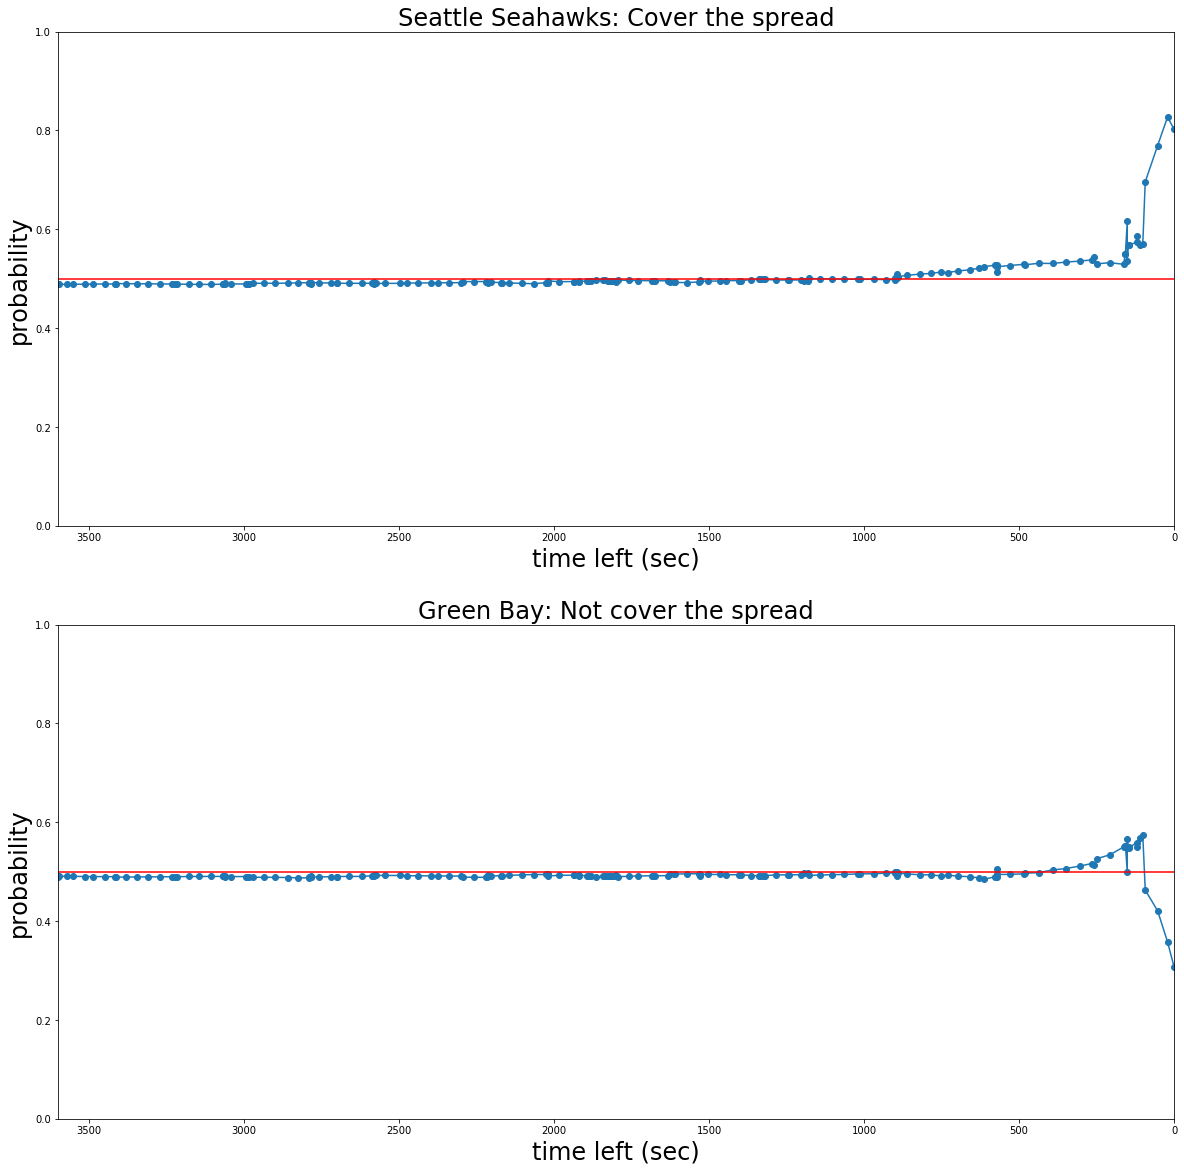

In [200]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 20))


ax1.scatter(d_f.lefttime, prob_f)
ax1.plot(d_f.lefttime, prob_f)
ax1.set_xlim(d_f.lefttime.max(), d_f.lefttime.min())
ax1.set_ylim(0, 1, 0.1)
ax1.axhline(y=0.5, color='r', linestyle='-')
ax1.set_title('Seattle Seahawks: Cover the spread', fontsize=24)
ax1.set_xlabel('time left (sec)', fontsize=24)
ax1.set_ylabel('probability', fontsize=24)

ax2.scatter(d_u.lefttime, prob_u)
ax2.plot(d_u.lefttime, prob_u)
ax2.set_xlim(d_u.lefttime.max(), d_u.lefttime.min())
ax2.set_ylim(0, 1, 0.1)
ax2.axhline(y=0.5, color='r', linestyle='-')
ax2.set_title('Green Bay: Not cover the spread', fontsize=24)
ax2.set_xlabel('time left (sec)', fontsize=24)
ax2.set_ylabel('probability', fontsize=24)






plt.show()

## Create dataset for evaluation

In [201]:
X = normalize(dat.loc[:,['lefttime', 'yrdln', 'score']])
prob = lg.predict_proba(X)
cover_prob = [p[1] for p in prob]
dat['prob'] = pd.Series(cover_prob)
dat.to_csv('data/baseline_need_evaluate.csv', index=False)
np.unique(cover_prob)

array([ 0.19796403,  0.22271712,  0.22299188, ...,  0.8887751 ,
        0.8889289 ,  0.89002638])